# tornado app的开发

本篇文档介绍app的相关开发。
阎王殿的所有app都位于apps文件夹下，每个app都有其独立的文件夹。在apps目录下，appsettings.py作为配置文件，存储app的基本设定，目前只包含端口号和模板目录路径。
在tornado中，一个网站称之为一个application，而每个页面被设计为可以处理多种请求的类，均继承tornado提供的RequestHandler类。通过tornado提供的路由功能，将application和各个页面组合起来，从而成为一个网站。
下面就是一个简单的user app的页面后端实现：

In [ ]:
# appsettings.py
import os
generalsettings = {
    'templates':r'D:\deadheaven\templates',
    'port':9000
}

In [ ]:
# encoding=utf-8
import tornado.ioloop
import tornado.web
import os
# 为了能让这个玩意在notebook里跑起来，注掉下面的两行
# from apps.appsettings import generalsettings
#from util.log.trace import Trace # 我们上次开发的log类
generalsettings = {
    'templates':r'D:\deadheaven\templates',
    'port':9000
}

class userLoginHandler(tornado.web.RequestHandler):
    # __tracer = Trace('user_app') 调用log类
    # get_template_path是RequestHandler的方法，用于获得默认的模板目录地址。通过重载此方法，我们可以指定每个app的模板路径
    def get_template_path(self):
        return os.path.join(generalsettings['templates'], 'user')
    
    # get方法，决定了当以get方式访问页面时要做的事情。在这里是渲染login.html模板作为前端页面，并将模板中的myusername赋值为空
    def get(self):
        #content_dict = {'username': ''}
        #self.__tracer.trace('user app get method',streamlevel=20,filelevel=20)
        # 通过render方法来渲染模板，第一个参数为模板文件名，随后的参数均为关键字参数，为要在模板中显示的变量值
        self.render('login.html',myusername='')
        
    # post方法，决定了以post方式访问页面时要做的事情，一般是提交表单。在这里，通过get_argument函数得到表单中输入域的值，并同样渲染login.html,
    # 将用户名打印在页面上。以后对数据库的相关操作基本就是在post或get方法中实现。
    def post(self):
        username = self.get_argument('username')
        password = self.get_argument('password')
        # self.__tracer.trace('user app post method', streamlevel=20, filelevel=20)
        content = {'myusername':username}
        # 关键字参数的另一种调用形式：将所有的变量名和值存在字典中，用**运算符作为函数的参数，即使用字典的内容作为参数而不是使用字典本身
        self.render('login.html',**content)


if __name__ == '__main__':
    # 注册一个application，并将主页设为userLoginHandler
    application = tornado.web.Application([
        (r"/", userLoginHandler),
        # (r"/xxx",other handler),
    ])
    # 决定要监听哪个端口，这里我们选择appsettings.py中的port，即9000
    application.listen(generalsettings['port'])
    # 开始监听循环
    tornado.ioloop.IOLoop.current().start()

下面让我们来看前端模板文件。与一般的前端文件不同，前端模板文件使用了一些特殊的语法以便后端能够将变量直接渲染到前端，甚至可以执行一些简单的函数。
以下就是user_app的前端模板文件，比较简单：
<html>
<head>
<title>阎王殿生死簿管理系统</title>
</head>
<body>
{% if myusername == '' %}
<p>注册用户</p>
<form method='post' action='/'>
<p>用户名：<input type='text' name='username' /></p>
<p>密码：<input type='password' name='password' /></p>
<p><input type='submit' value='提交'/></p>
</form>
{% else %}
欢迎，{{ myusername }}
{% end %}
</body>
</html>
在tornado提供的模板语法中，可以通过{% if %} {% elif %} {% else %} {% end %}的这一套语法对前端进行逻辑判断，其他还有诸如{% for %}，{% block %}等更多关键字将在以后介绍。在这里，我们要判断后端传过来的myusername变量是否为空来决定是否显示表单。若为空，则显示注册表单，否则提示欢迎信息。在模板中，使用两个大括号来表示变量或表达式，如这里的{{ myusername }}，注意变量和前后的大括号之间都要有空格。myusername也即后端python中字典的key。

在把模板放到指定目录下后，运行python代码，在浏览器中输入127.0.0.1:9000，即可看到一个注册表单：
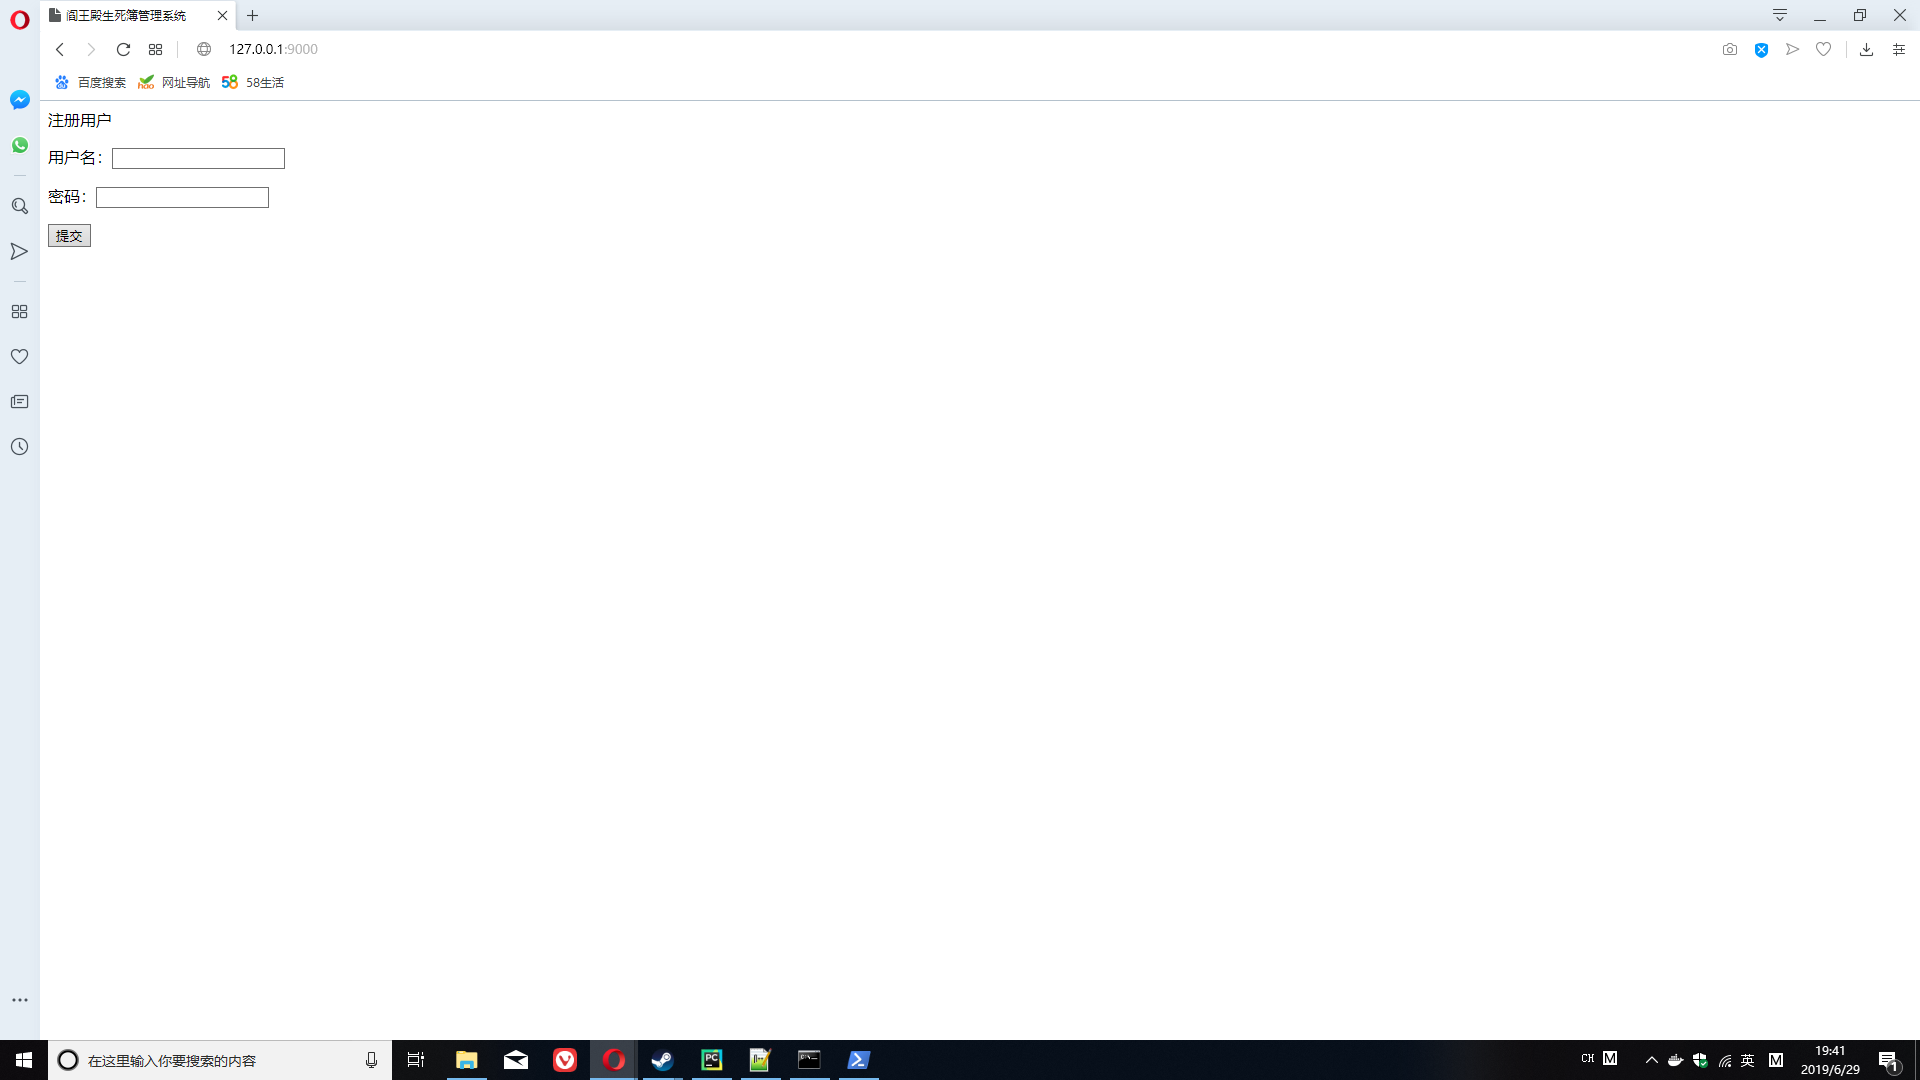
在输入用户名和密码后，点击确定，会看到欢迎信息：
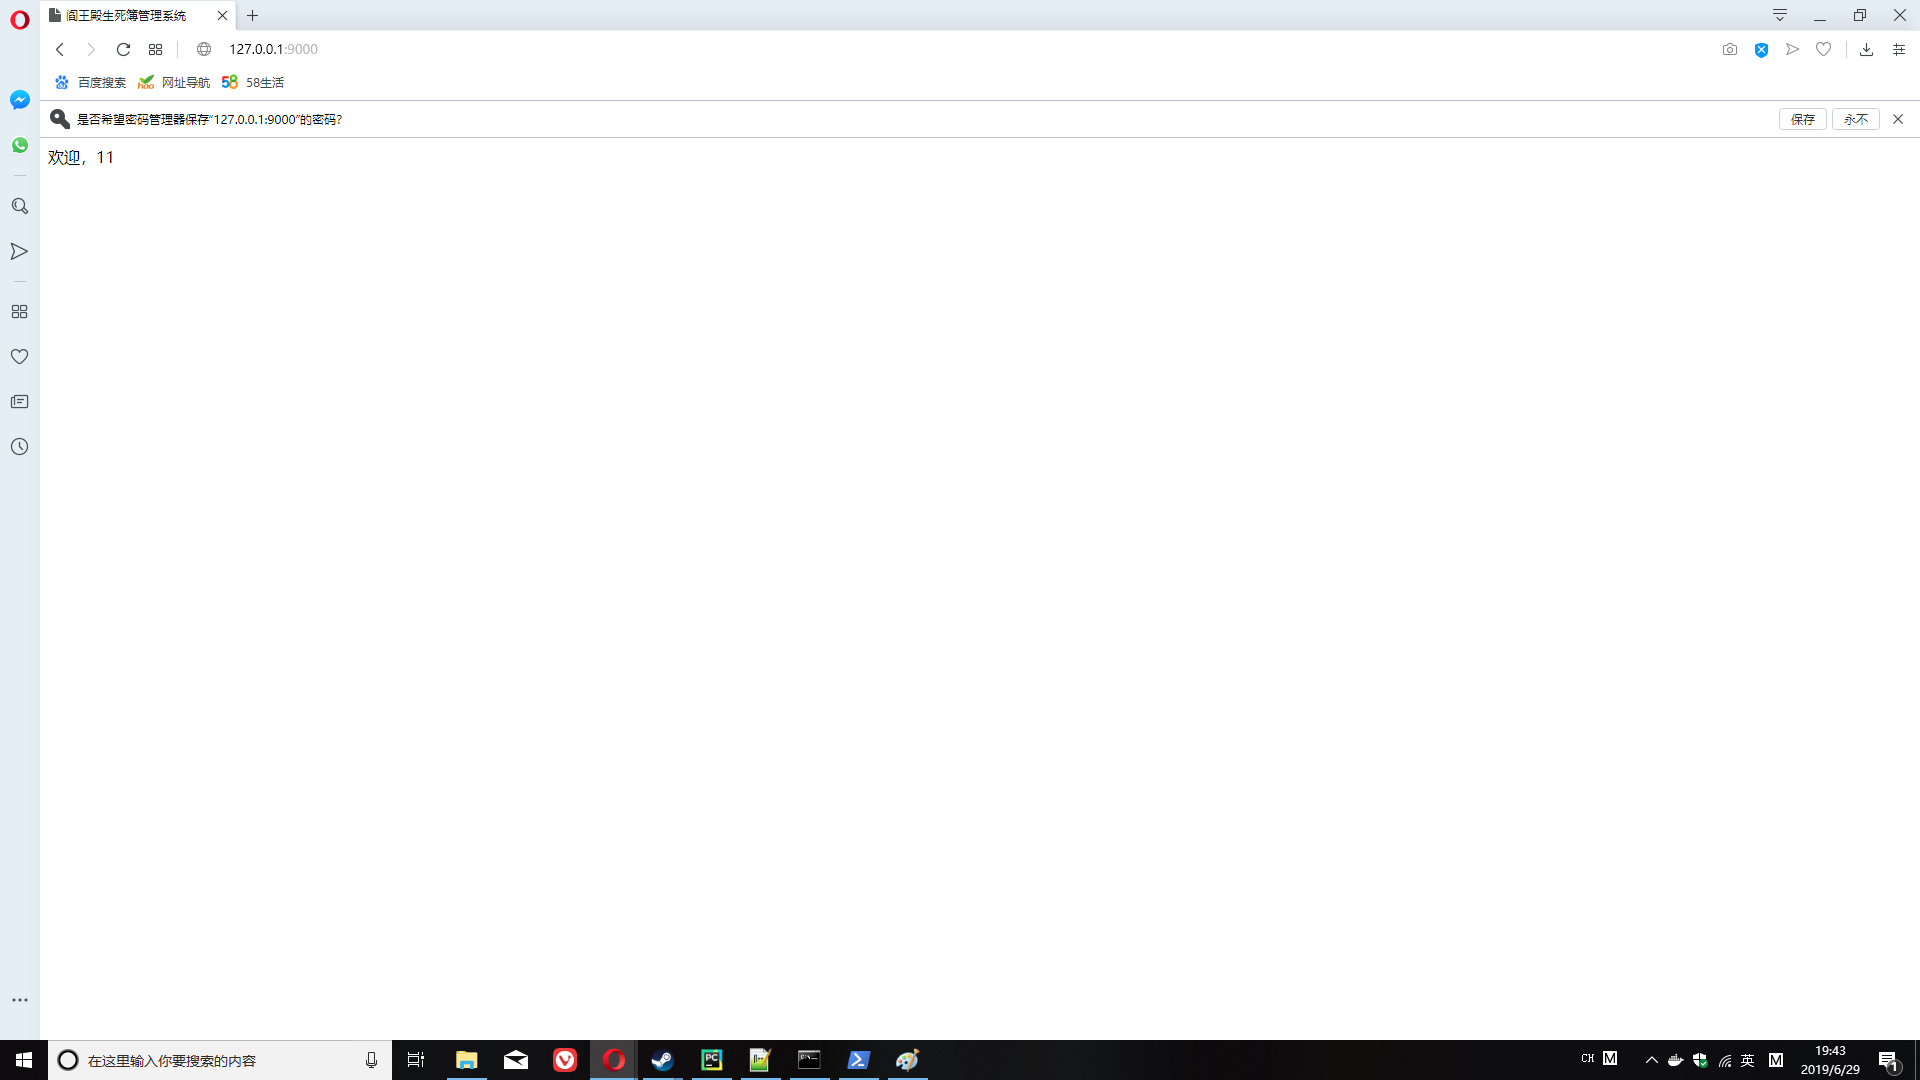

好了，大家可以玩一下了。